# Quick and Dirty Data Exploration!

1) List the EDF files. 

2) Import Label files. 

3) Find a file (edf) with a Seizure (seiz). 

4) Show EEG segment with seizure and background data. 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.io import read_raw_edf

#%matplotlib notebook
%matplotlib inline

# List EDF Files

In [4]:
from glob import glob

dfs = {"train": None, "dev": None}

data_root = '/Users/yannick/Documents/NeurekaEpilepsy2020/data/edf/'
#data_root = '/data/edf/'

data_path = (data_root + "train/")
print("=== Train Set ===")
files_train = glob(data_path + '**/*' + '.edf', recursive=True)
for file in files_train:
    print(file[len(data_root):])
    
data_path = (data_root + "dev/")
print("=== Dev Set ===")
files_dev = glob(data_path + '**/*' + '.edf', recursive=True)
for file in files_dev:
    print(file[len(data_root):])

=== Train Set ===
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t008.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t009.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t001.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t000.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t002.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t003.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t007.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t006.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t004.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t010.edf
train/03_tcp_ar_a/104/00010418/s018_2014_06_01/00010418_s018_t005.edf
train/03_tcp_ar_a/104/00010418/s016_2014_05_30/00010418_s016_t001.edf
train/03_tcp_ar_a/104/00010418/s016_2014_05_30/00010418_s016_t000.edf
train/03_tcp_ar_a/104/00010418/s016_2014_05_30/00010418_s016_t002.edf
tr

train/01_tcp_ar/134/00013407/s004_2015_10_01/00013407_s004_t002.edf
train/01_tcp_ar/134/00013407/s004_2015_10_01/00013407_s004_t003.edf
train/01_tcp_ar/134/00013407/s004_2015_10_01/00013407_s004_t007.edf
train/01_tcp_ar/134/00013407/s004_2015_10_01/00013407_s004_t006.edf
train/01_tcp_ar/134/00013407/s004_2015_10_01/00013407_s004_t004.edf
train/01_tcp_ar/134/00013407/s005_2015_10_02/00013407_s005_t008.edf
train/01_tcp_ar/134/00013407/s005_2015_10_02/00013407_s005_t001.edf
train/01_tcp_ar/134/00013407/s005_2015_10_02/00013407_s005_t000.edf
train/01_tcp_ar/134/00013407/s005_2015_10_02/00013407_s005_t002.edf
train/01_tcp_ar/134/00013407/s005_2015_10_02/00013407_s005_t007.edf
train/01_tcp_ar/134/00013407/s005_2015_10_02/00013407_s005_t006.edf
train/01_tcp_ar/134/00013407/s005_2015_10_02/00013407_s005_t004.edf
train/01_tcp_ar/134/00013407/s001_2015_09_28/00013407_s001_t002.edf
train/01_tcp_ar/134/00013407/s001_2015_09_28/00013407_s001_t003.edf
train/01_tcp_ar/134/00013407/s001_2015_09_28/000

train/01_tcp_ar/055/00005533/s006_2012_04_13/00005533_s006_t007.edf
train/01_tcp_ar/055/00005533/s006_2012_04_13/00005533_s006_t012.edf
train/01_tcp_ar/097/00009762/s001_2012_09_18/00009762_s001_t000.edf
train/01_tcp_ar/097/00009734/s001_2012_02_08/00009734_s001_t000.edf
train/01_tcp_ar/090/00009097/s002_2013_04_29/00009097_s002_t002.edf
train/01_tcp_ar/090/00009097/s002_2013_04_29/00009097_s002_t000.edf
train/01_tcp_ar/090/00009097/s002_2013_04_29/00009097_s002_t001.edf
train/01_tcp_ar/090/00009030/s001_2012_07_02/00009030_s001_t000.edf
train/01_tcp_ar/090/00009050/s004_2012_09_23/00009050_s004_t004.edf
train/01_tcp_ar/090/00009050/s004_2012_09_23/00009050_s004_t005.edf
train/01_tcp_ar/090/00009050/s004_2012_09_23/00009050_s004_t006.edf
train/01_tcp_ar/090/00009050/s004_2012_09_23/00009050_s004_t002.edf
train/01_tcp_ar/090/00009050/s004_2012_09_23/00009050_s004_t003.edf
train/01_tcp_ar/090/00009050/s004_2012_09_23/00009050_s004_t001.edf
train/01_tcp_ar/090/00009044/s001_2012_09_07/000

train/01_tcp_ar/122/00012229/s007_2014_11_20/00012229_s007_t003.edf
train/01_tcp_ar/122/00012229/s007_2014_11_20/00012229_s007_t008.edf
train/01_tcp_ar/122/00012229/s007_2014_11_20/00012229_s007_t009.edf
train/01_tcp_ar/114/00011468/s001_2014_05_08/00011468_s001_t000.edf
train/01_tcp_ar/114/00011455/s001_2014_05_09/00011455_s001_t001.edf
train/01_tcp_ar/114/00011455/s001_2014_05_09/00011455_s001_t000.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/00011454_s003_t006.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/00011454_s003_t007.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/00011454_s003_t005.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/00011454_s003_t010.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/00011454_s003_t004.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/00011454_s003_t000.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/00011454_s003_t001.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/00011454_s003_t002.edf
train/01_tcp_ar/114/00011454/s003_2014_02_10/000

dev/01_tcp_ar/095/00009578/s019_2013_08_18/00009578_s019_t004.edf
dev/01_tcp_ar/095/00009578/s019_2013_08_18/00009578_s019_t001.edf
dev/01_tcp_ar/095/00009578/s019_2013_08_18/00009578_s019_t000.edf
dev/01_tcp_ar/095/00009578/s019_2013_08_18/00009578_s019_t002.edf
dev/01_tcp_ar/095/00009578/s019_2013_08_18/00009578_s019_t003.edf
dev/01_tcp_ar/095/00009578/s020_2013_08_18/00009578_s020_t000.edf
dev/01_tcp_ar/095/00009578/s020_2013_08_18/00009578_s020_t001.edf
dev/01_tcp_ar/095/00009578/s020_2013_08_18/00009578_s020_t003.edf
dev/01_tcp_ar/095/00009578/s020_2013_08_18/00009578_s020_t002.edf
dev/01_tcp_ar/095/00009578/s020_2013_08_18/00009578_s020_t006.edf
dev/01_tcp_ar/095/00009578/s020_2013_08_18/00009578_s020_t007.edf
dev/01_tcp_ar/095/00009578/s020_2013_08_18/00009578_s020_t005.edf
dev/01_tcp_ar/095/00009578/s020_2013_08_18/00009578_s020_t004.edf
dev/01_tcp_ar/095/00009578/s017_2013_08_16/00009578_s017_t006.edf
dev/01_tcp_ar/095/00009578/s017_2013_08_16/00009578_s017_t004.edf
dev/01_tcp

# Label Files

In [5]:
import pandas as pd

df_labels_train = pd.read_csv(data_root+'../_DOCS/ref_train.txt', sep=' ', names=['File', 'Start', 'Stop', 'Label', 'Confidence'])
df_labels_dev = pd.read_csv(data_root+'../_DOCS/ref_dev.txt', sep=' ', names=['File', 'Start', 'Stop', 'Label', 'Confidence'])

df_labels_train.head()
df_labels_dev.head()

,File,Start,Stop,Label,Confidence
0,00000258_s002_t000,0.0,20.0000,bckg,1.0
1,00000258_s002_t002,0.0,272.0000,bckg,1.0
2,00000258_s003_t000,0.0,234.0000,bckg,1.0
3,00000258_s003_t001,0.0,224.0000,bckg,1.0
4,00000258_s003_t002,0.0,8.8275,bckg,1.0


In [6]:
print("Number of Seizures in Training Set = \t" + str(df_labels_train[df_labels_train['Label'] == 'seiz']['Label'].count()))
print("Number of Seizures in Dev Set = \t" + str(df_labels_dev[df_labels_dev['Label'] == 'seiz']['Label'].count()))

Number of Seizures in Training Set = 	2370
Number of Seizures in Dev Set = 	673


In [7]:
df_labels_train['Length'] = df_labels_train['Stop'] - df_labels_train['Start']

print(str(df_labels_train[df_labels_train['Length'] < 0]['Length'].count()) + ' file(s) with a negative length.')

df_labels_train.head()

0 file(s) with a negative length.


,File,Start,Stop,Label,Confidence,Length
0,00000077_s003_t000,0.0,1205.0,bckg,1.0,1205.0
1,00000254_s005_t000,0.0,1442.0,bckg,1.0,1442.0
2,00000254_s006_t001,0.0,1197.0,bckg,1.0,1197.0
3,00000254_s007_t000,0.0,1244.0,bckg,1.0,1244.0
4,00000272_s007_t000,0.0,194.0,bckg,1.0,194.0


# Seizure Example

In [8]:
import re

df = df_labels_train[df_labels_train['Label'] == 'seiz'].iloc[1]
file = df['File']
start_time = df['Start']
stop_time = df['Stop']
length = df['Length']
print("The file: " + file + ".edf has a seizure.")

full_path = [x for x in files_train if re.search(file, x)][0]
print("Its full path is: " + full_path)

The file: 00000492_s003_t001.edf has a seizure.
Its full path is: /Users/yannick/Documents/NeurekaEpilepsy2020/data/edf/train/01_tcp_ar/004/00000492/s003_2003_07_18/00000492_s003_t001.edf


In [37]:
raw_seiz = read_raw_edf(full_path, preload=True)
raw_seiz.info

Extracting EDF parameters from /Users/yannick/Documents/NeurekaEpilepsy2020/data/edf/train/01_tcp_ar/004/00000492/s003_2003_07_18/00000492_s003_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 73599  =      0.000 ...   183.998 secs...


<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 200.0 Hz
 meas_date: 2003-07-28 00:00:00 UTC
 nchan: 32
 projs: []
 sfreq: 400.0 Hz
>

## The Manual Way

<IPython.core.display.Javascript object>


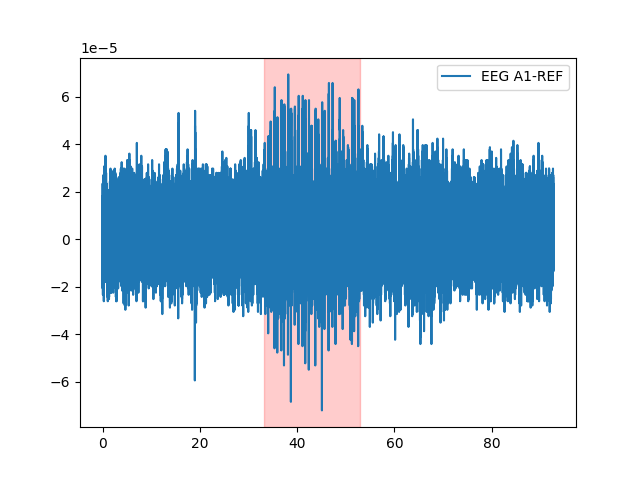

Seizure from 33.1425 to 53.0 (19.8575)


In [50]:
%matplotlib notebook

start_tick = raw_seiz.time_as_index(start_time)[0]
stop_tick = raw_seiz.time_as_index(stop_time)[0]
bckg_buffer = int((stop_tick - start_tick) * 2)

real_start_tick = max(raw_seiz.first_samp, start_tick - bckg_buffer)
real_stop_tick = min(raw_seiz.last_samp, stop_tick + bckg_buffer)

channel_names = ['EEG A1-REF']
eeg = raw_seiz[channel_names, real_start_tick:real_stop_tick]
lines = plt.plot(eeg[1], eeg[0].T)
plt.axvspan(start_time, stop_time, color='r', alpha=0.2)

plt.legend(lines, channel_names)
plt.show()

print("Seizure from " + str(start_time) + " to " + str(stop_time) + " (" + str(length) + ")")

## The MNE - Annotations Way

<IPython.core.display.Javascript object>


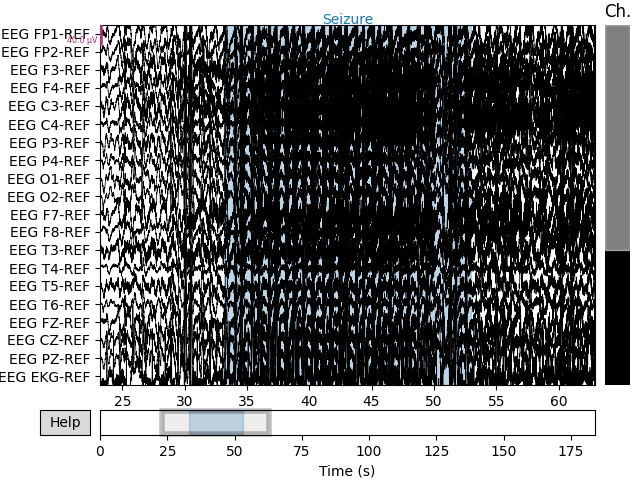

<IPython.core.display.Javascript object>


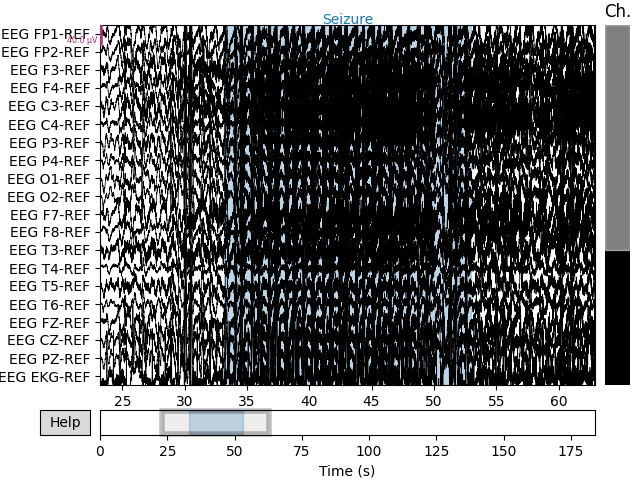

In [51]:
annotations = mne.Annotations(start_time, length, "Seizure")  
raw_seiz.set_annotations(annotations) 

raw_seiz.plot(start=max(0, start_time-length*0.5), duration=length*2)

<IPython.core.display.Javascript object>


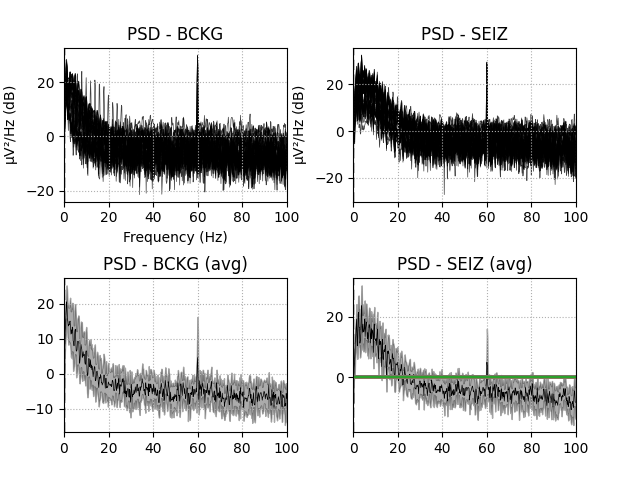

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)


<ipython-input-78-3144a967248e>:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_seiz.plot_psd(tmin=stop_time, tmax=stop_time+length, fmin=0, fmax=100, ax=ax1)
<ipython-input-78-3144a967248e>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_seiz.plot_psd(tmin=start_time, tmax=stop_time, fmin=0, fmax=100, ax=ax2)


In [78]:
fig = plt.figure()

#  subplot #1
ax1 = fig.add_subplot(221)
#raw_seiz.plot_psd(tmin=0, tmax=start_time, fmin=0, fmax=100, ax=ax1)
raw_seiz.plot_psd(tmin=stop_time, tmax=stop_time+length, fmin=0, fmax=100, ax=ax1)
ax1.set_title('PSD - BCKG')

#  subplot #2
ax2 = fig.add_subplot(222)
raw_seiz.plot_psd(tmin=start_time, tmax=stop_time, fmin=0, fmax=100, ax=ax2)
ax2.set_title('PSD - SEIZ')

#  subplot #3
ax3 = fig.add_subplot(223)
raw_seiz.plot_psd(tmin=stop_time, tmax=stop_time+length, fmin=0, fmax=100, ax=ax3, average=True)
ax3.set_title('PSD - BCKG (avg)')

#  subplot #4
ax4 = fig.add_subplot(224)
raw_seiz.plot_psd(tmin=start_time, tmax=stop_time, fmin=0, fmax=100, ax=ax4, average=True)
ax4.set_title('PSD - SEIZ (avg)')

plt.show()

<IPython.core.display.Javascript object>


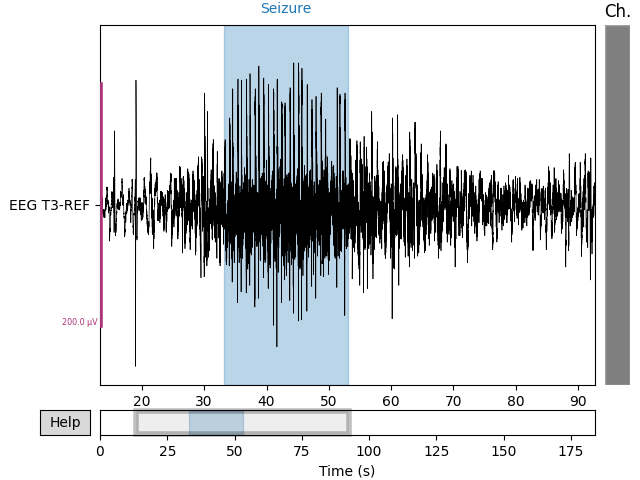

<IPython.core.display.Javascript object>


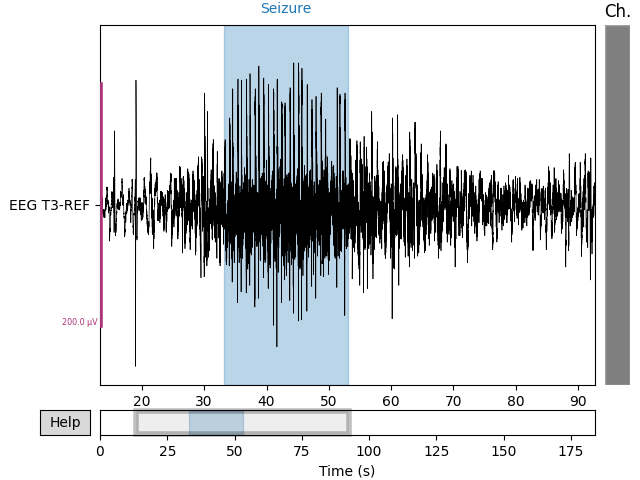

In [55]:
# Let's get 1 channel and look at the power spectrum of a segment with and a segment without seizure.

sub_raw_seiz = raw_seiz.copy().pick(picks='EEG T3-REF')

sub_raw_seiz.plot(start=max(0, start_time-length), duration=length*4, scalings=1E-4)

In [110]:
# From: https://github.com/drasros/sleep_staging_shhs/blob/master/shhs.py
# and now rearrange into nparray of training samples

samplesper3s = 3 * sub_raw_seiz.info['sfreq']
sub_data_seiz = sub_raw_seiz.get_data()[0]

too_much = int(sub_data_seiz.shape[0] % samplesper3s)
if too_much != 0:
    sub_data_seiz = sub_data_seiz[:-too_much]
    
numberofintervals = int(sub_data_seiz.shape[0] / samplesper3s)

sub_windows_seiz = np.array(np.split(sub_data_seiz, numberofintervals, axis=0))

print("Full length of file: " + str(sub_data_seiz.shape[0]))
print("Number of Windows: " + str(numberofintervals))
print("Length of Windows: " + str(samplesper3s))
print("File splitted into: " + str(sub_windows_seiz.shape[0]) + " of " + str(sub_windows_seiz.shape[1]) + " samples (" +
      str(sub_windows_seiz.shape[1] / sub_raw_seiz.info['sfreq']) + " sec).")

Full length of file: 73200
Number of Windows: 61
Length of Windows: 1200.0
File splitted into: 61 of 1200 samples (3.0 sec).


<IPython.core.display.Javascript object>


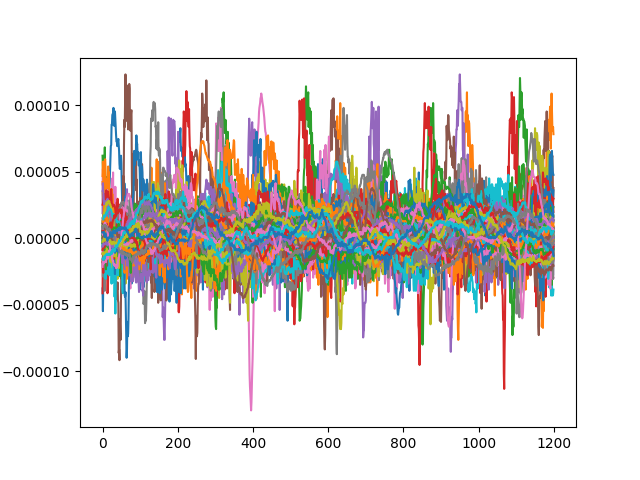

In [117]:
plt.figure()

for i in range(0, sub_windows_seiz.shape[0]):
    plt.plot(sub_windows_seiz[i,:])

plt.show()

In [ ]:
# Label each window!
# then replot with 2 colors!



In [53]:
#comp1.loc[pd.Timedelta(minutes=8, seconds=18):pd.Timedelta(minutes=8, seconds=25)]
#Index with time!